<a href="https://colab.research.google.com/github/ShihaoCui/18337/blob/master/DispersionRelation_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Input,GRU
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import load_model
import keras
# numpy.matrix.mean
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Convolution2D,Conv1D, MaxPooling1D,Convolution1D
from keras.utils import np_utils
from keras import backend as K
from keras import optimizers
# from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import pickle
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as scio
import math

In [2]:
# this function is to show the confusion matrix
def comfusion_matrix_show(model,x_test,y_test):
    
    # predicted results
    y_pred = model.predict(x_test)
    # get the position of result
    y_pred_classes = np.argmax(y_pred,axis = 1)
    # get the postion of test data
    y_true = np.argmax(y_test,axis = 1)
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(15,15))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", color = 'g');
    return plt

In [3]:
def Normalization1(x):
  for i in range(x.shape[0]):
    slice = x[i,:];
    x[i,:] = (slice -np.min(slice))/(np.max(slice)-np.min(slice))
  return x

# def Normalization2(x):
#   for i in range(x.shape[1]):
#     slice = x[:,:,i];
#     x[:,:,i] = (slice -np.mean(slice))/(np.max(slice)-np.min(slice))
#   return x

# def Normalization3(x):
#   for i in range(x.shape[1]):
#     slice = x[:,:,i];
#     x[:,:,i] = (slice -np.mean(slice))/(np.std(slice))
#   return x

In [4]:
!git clone https://github.com/ShihaoCui/MyData_1.git

Cloning into 'MyData_1'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [5]:
## Data Load
dataFile = './sig_plus.mat'
data = scio.loadmat(dataFile)

# filenames = './bearingTest/Data/XY_te.csv'
# data1 = np.loadtxt(filenames, delimiter=',')
# # data = data.reshape(996,19,19)
# filenames = './bearingTest/Data/XY_tr.csv'
# data2 = np.loadtxt(filenames, delimiter=',')

FileNotFoundError: ignored

In [ ]:
data2.shape
# data2.shape[1]

(3600, 1025)

In [ ]:
x_train = data2[:,0:data2.shape[1]-1]
y_train = data2[:,data2.shape[1]-1:data2.shape[1]]
x_train = x_train.reshape(-1,1024,1)
print(y_train.shape)


x_test = data1[:,0:data1.shape[1]-1]
y_test = data1[:,data1.shape[1]-1:data1.shape[1]]
print(y_test.shape)
x_test = x_test.reshape(400,1024,1);
print(x_test.shape)

(3600, 1)
(400, 1)
(400, 1024, 1)


In [ ]:
label_size = 4;

x_train = np.array(x_train,dtype =float)
y_train = np.array(y_train,dtype =float)
x_test = np.array(x_test,dtype =float)
y_test = np.array(y_test,dtype =float)
y_test = y_test.reshape(400,);
y_train = y_train.reshape(3600,);

In [ ]:
# x_train = Normalization1(x_train)
# x_test = Normalization1(x_test)
y_train = np_utils.to_categorical(y_train-1,num_classes = label_size)
y_test = np_utils.to_categorical(y_test-1,num_classes = label_size)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# plt.plot(x_test[:,1])
label_size = 4;

(3600, 1024, 1)
(400, 1024, 1)
(3600, 4)
(400, 4)


In [ ]:
model= Sequential()
# model.add(Embedding(10000,8,input_length=6))
model.add(Conv1D(6,kernel_size=15,batch_input_shape=(None,1024,1),padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv1D(6,kernel_size=4,padding='same'))
model.add(MaxPooling1D(pool_size=2))
model.add(Activation('relu'))
# model.add(Conv1D(5,kernel_size=4,padding='same'))
# model.add(LSTM(20,return_sequences=True))
model.add(Flatten())
# model.add(Dropout(0.2, input_shape=(60,)))
# model.add(Dense(200))
# model.add(Activation('relu'))
model.add(Dense(200))
# model.add(Dropout(0.2, input_shape=(60,)))
model.add(Activation('relu'))
# model.add(Dense(32))
# model.add(Activation('relu'))
model.add(Dense(label_size, activation='softmax'))
# model.compile(loss = 'mean_absolute_error',optimizer = 'adam',metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

NameError: ignored

Epoch 1/500
113/113 [==============================] - 1s 5ms/step - loss: 1.2749 - accuracy: 0.4056 - val_loss: 1.6167 - val_accuracy: 0.2550
Epoch 2/500
113/113 [==============================] - 0s 4ms/step - loss: 0.8463 - accuracy: 0.6097 - val_loss: 2.5177 - val_accuracy: 0.2550
Epoch 3/500
113/113 [==============================] - 0s 4ms/step - loss: 0.6260 - accuracy: 0.7167 - val_loss: 3.3145 - val_accuracy: 0.3425
Epoch 4/500
113/113 [==============================] - 0s 4ms/step - loss: 0.5094 - accuracy: 0.7753 - val_loss: 3.5763 - val_accuracy: 0.3400
Epoch 5/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4933 - accuracy: 0.7786 - val_loss: 4.4241 - val_accuracy: 0.3675
Epoch 6/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4206 - accuracy: 0.8244 - val_loss: 6.5887 - val_accuracy: 0.3525
Epoch 7/500
113/113 [==============================] - 0s 4ms/step - loss: 0.3996 - accuracy: 0.8336 - val_loss: 3.6029 - val_accuracy: 0.3650

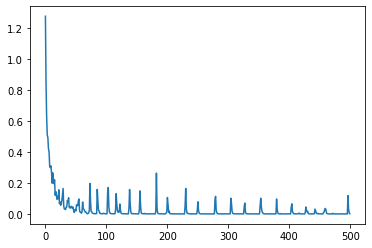

In [ ]:
history = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))
# Loss: convergence or not
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# the accuracy of the test data
loss, acc = model.evaluate(x_test, y_test)
print("Accuracy of test is: "+str(100*acc)+"%")

13/13 [==============================] - 0s 2ms/step - loss: 1.3174 - accuracy: 0.8150
Accuracy of test is: 81.49999976158142%


In [ ]:
y_test.shape

(400, 4)

In [ ]:
x_test.shape

(400, 1024, 1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

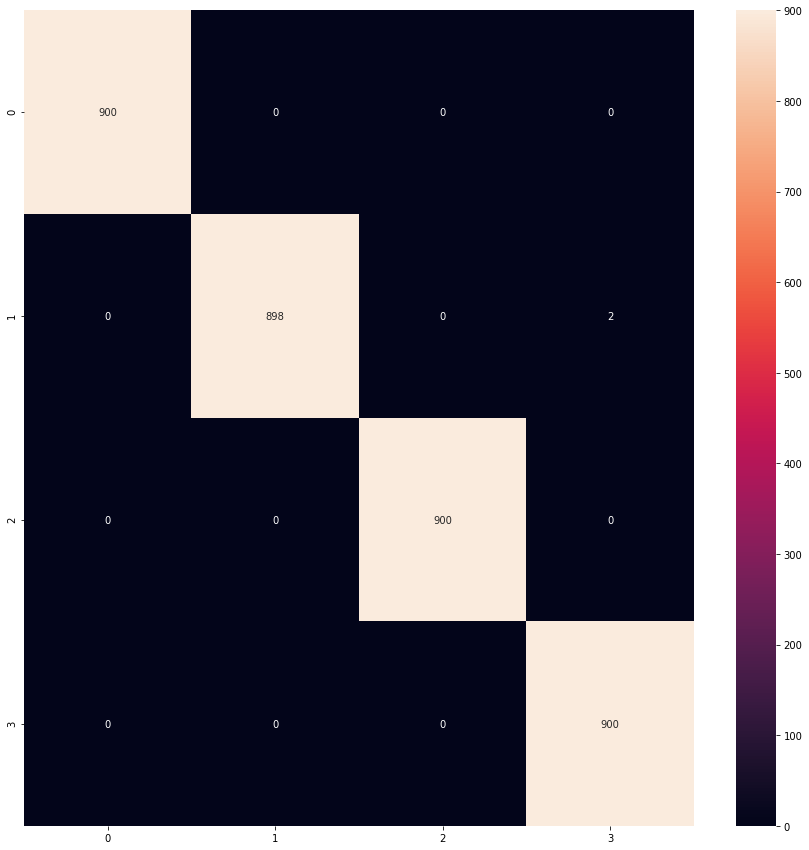

In [ ]:
comfusion_matrix_show(model,x_train,y_train)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

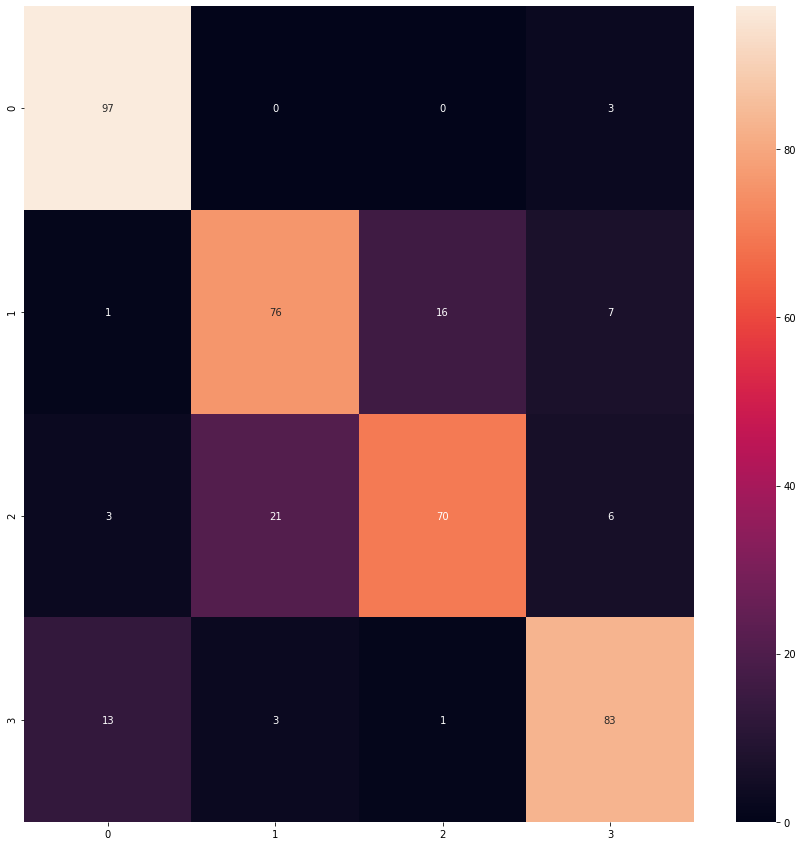

In [ ]:
comfusion_matrix_show(model,x_test,y_test)